# Atividade 01 - Parte 01: Inventário de emissões utilizando Python


#### Alunos: Matheus Henrique Lourenço de Oliveira (19205617) e Mayara Dargas Sousa (20203642)

# Etapa 01: Introdução

O presente estudo tem o objetivo de realizar uma estimativa das emissões de Material Particulado (PM), Óxidos de Nitrogênio (NOx), Dóxido de Enxofre (SO2) e Dióxido de carbono (CO2) com base em dados do Relatório de ESG do grupo MOHAWK, o qual a marca Eliane revestimentosfaz parte. Foi utilizado o capítulo 11.7 da AP42, pois o empreendimento trata-se de uma Indústria de Revestimentos Cerâmicos (https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf).

Os valores descritos na tabela seguir apresenta os fatores de emissão fornecidos pela AP-42, os quais foram convertidos de lb/ton para kg/ton, conforme instruções da Ap-42. Para o dióxido de enxofre (SO2), foi adotado o valor citado na referência: "Reference 10. For facilities using raw material with a sulfur content greater than 0.07 percent. The variable S represents the raw material sulfur content (percent). For facilities using raw material with a sulfur content less than or equal to 0.07 percent, use 9.5 S lb/ton to estimate emissions.”

## Fluxograma do processo produtivo

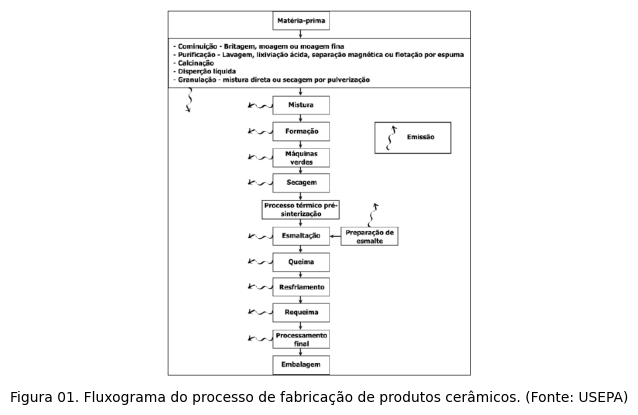

In [208]:
import matplotlib.pyplot as plt

# Caminho para a imagem no seu computador
caminho_imagem = 'C:\\Users\\mayar\\Downloads\\Captura de tela 2024-05-03 221653.png' 

# Carregar a imagem usando plt.imread()
imagem = plt.imread(caminho_imagem)

# Exibir a imagem usando plt.imshow()
plt.imshow(imagem)
plt.axis('off')  # Oculta os eixos

# Adicionar legenda
plt.text(0.5, -0.05, 'Figura 01. Fluxograma do processo de fabricação de produtos cerâmicos. (Fonte: USEPA)',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()


# Etapa 02: Planilha de fatores de emissões compilada

In [184]:
import pandas as pd
import os
from IPython.display import display

# Coletando o caminho da pasta que estamos
caminho_atual = os.getcwd()

# Definindo o caminho da pasta dos fatores de emissão
caminho_fe = os.path.join(caminho_atual, 'tabelas', 'FE')

# Indicando o número do capítulo e subcapítulo
capitulo = 11
subcapitulo = 7

# Construindo o nome do arquivo
nome_arquivo = f'chp_{capitulo}_{subcapitulo}.csv'

# Caminho completo do arquivo
caminho_arquivo = os.path.join(caminho_fe, nome_arquivo)

# Abrindo o arquivo utilizando o Pandas
fe = pd.read_csv(caminho_arquivo)

# Estilizando a planilha com cores alternadas para as linhas e colunas
styled_fe = fe.style.set_properties(**{'text-align': 'center'}) \
                     .set_table_styles([
                         {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
                         {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},
                         {'selector': 'th', 'props': [('background-color', '#e6e6e6')]},
                         {'selector': 'td', 'props': [('background-color', 'white')]}
                     ])

# Exibindo a planilha estilizada na tela
display(styled_fe)


,Source,PM,SO2,NOX
0,Comminution,0.060000,nan,nan
1,Dryer,1.150000,nan,nan
2,Cooler,0.055000,nan,nan
3,Granulation,0.095000,nan,nan
4,Firing natural gas,0.245000,4.750000,0.270000
5,Refiring natural gas,0.033500,nan,nan
6,Ceramic glaze spray booth,0.900000,nan,nan


## Estimativa da produção: premissas adotadas e valores fornecidos

Conforme dados institucionais de 2021, a Eliane revestimentos produz 40.8 milhões de m² de revestimento por ano, distribuídos em 6 unidades em todo o Brasil. Assumindo a premissa de que cada unidade produz a mesma quantidade, a unidade de interesse, em Criciúma - SC, produziria aproximadamente 6.8 milhões de m² de revestimento.

Além disso, de modo a estimar este valor em toneladas, foram utilizados os valores de peso e medida do modelo mais vendido da fábrica, o porcelanato Bianco plus NA 60X60 com as seguintes especificações técnicas:

- Peso da caixa: 30,38 kg
- Rendimento: 1,44 m²

Portanto, se: 

30,38 kg ----- 1,44 m² 

   X     ----- 6.8 x 10^6 m²

X = 143.46111 x 10^6 kg = 143461,11 toneladas/ano 

ou então, 

11955,09 toneladas/mês  e 393,04 ton/dia. Também assumindo a premissa de uma escala produtiva uniforma ao longo do ano.

## Plotando os fatores de emissão

364176.02773499995
1
2
3


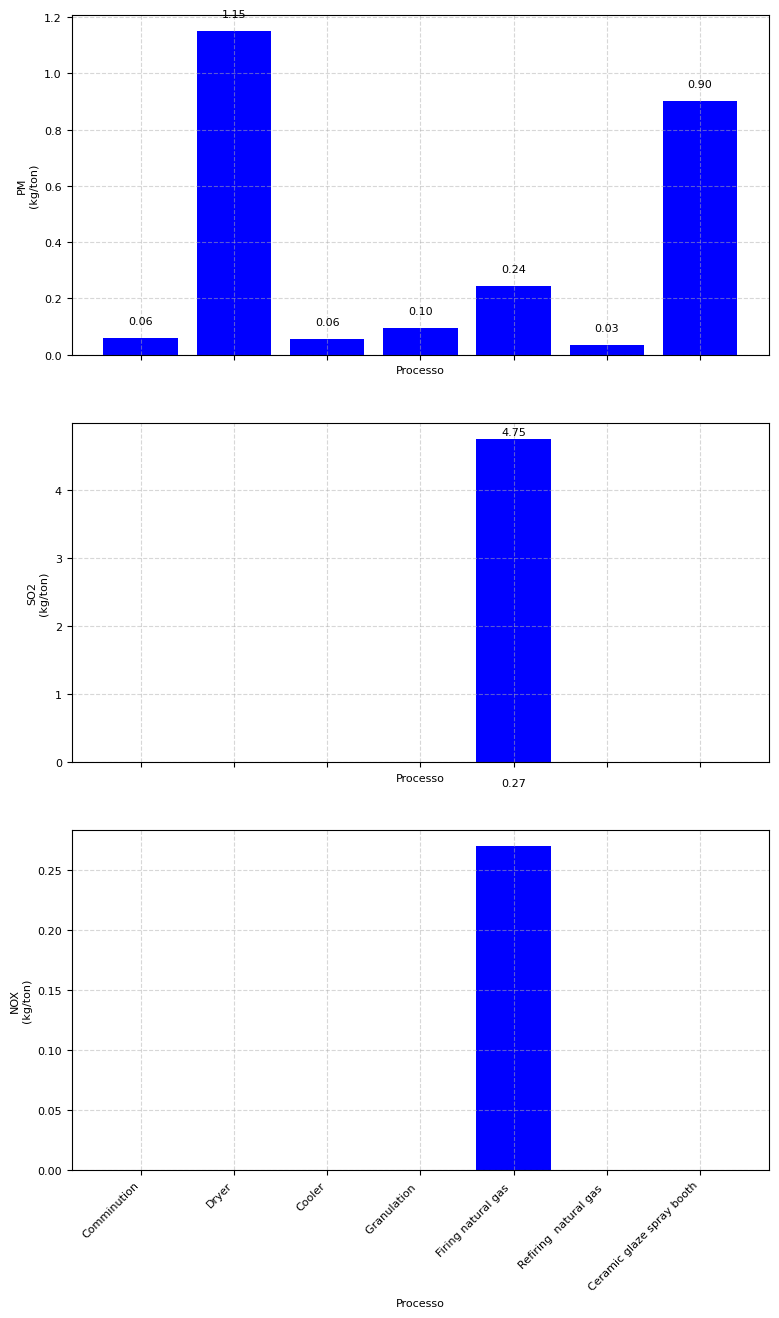

In [185]:
import matplotlib.pyplot as plt
import numpy as np

atv = 143461.11  # A unidade descrita aqui é toneladas. Os processos para determinar este valor estão descritos anteriormente
emis = fe['PM'] * atv

cwd = os.getcwd()

# Somando dataframe
print(emis.sum())

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig, ax = plt.subplots(len(fe.columns) - 1, 1, sharex=True, figsize=(9, 15))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)):
    print(ii)
    ax[ii - 1].bar(fe['Source'], fe.iloc[:, ii], color=['blue'])
    ax[ii - 1].set_xlabel('Processo', fontsize=8)  # Define o tamanho da fonte para o eixo x
    ax[ii - 1].set_ylabel(fe.columns[ii] + '\n(kg/ton)', fontsize=8)  # Define o tamanho da fonte para o eixo y

    # Define o tamanho da fonte para os rótulos dos ticks nos eixos x e y
    ax[ii - 1].tick_params(axis='x', labelsize=8)
    ax[ii - 1].tick_params(axis='y', labelsize=8)

    # Define os rótulos dos ticks nos eixos x
    ax[ii - 1].set_xticks(fe['Source'].index)  # Define a localização dos ticks no eixo x
    ax[ii - 1].set_xticklabels(fe['Source'], rotation=45, ha='right', fontsize=8)  # Define os rótulos dos ticks no eixo x

    # Adicionando linhas de grade
    ax[ii - 1].grid(True, linestyle='--', alpha=0.5)

    # Adicionando rótulos nos topos das barras
    for x, y in zip(fe['Source'], fe.iloc[:, ii]):
        if np.isfinite(y):  # Verifica se o valor de y é finito
            ax[ii - 1].text(x, y + 0.05, f'{y:.2f}', ha='center', fontsize=8)

# Salva a figura na pasta figures
fig.savefig(cwd + '\\figures\\barplot_fatorEmiss.png')

plt.show()


## Qual é o processo do empreendimento que possui maior emissão? analise os fatores de emissão através de figuras, comparando os processos

Não é possível avaliar de forma precisa qual o processo do empreendimento que produz mais poluentes devido a ausência de valores de fatores de emissão para todos os processos mencionados. Entretanto, se for avaliado apenas a emissão de partículado, o processo que possui a maior emissão ao longo de um ano é a o secador ou "dryer".

# Etapa 03: Criando taxa de atividade aleatória com sazonalidade

Considerando que há apenas um dado anual disponível, a taxa de atividade foi convertida para toneladas por dia, resultando em um valor de aproximadamente 393,04 ton/dia. Reconhecendo que a produção não é um valor constante e que a produtividade pode variar de um dia para outro, será considerado um cenário hipotético. Onde a taxa de atividade é calculada estipulando uma faixa de valores a partir de atividades máximas e mínimas, em que foi considerado uma variação de 393,04 ±0,5 ton/dia.


## Série temporal das emissões mensais do empreendimento

      Atividade
0    392.648900
1    393.122719
2    393.317915
3    392.547370
4    393.403467
..          ...
995  392.703854
996  393.440978
997  392.886831
998  392.919921
999  393.437933

[1000 rows x 1 columns]


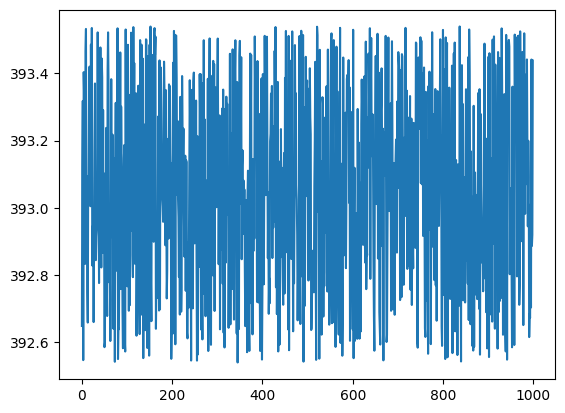

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Criando vetor de valores aleatórios
atvMax = 393.54
atvMin = 392.54
n = 1000
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin
#print(atv)

# Exportando os dados para um arquivo .csv
output_folder = 'outputs'
output_file = 'dados_aleatorios.csv'
output_path = os.path.join(output_folder, output_file)

# Criando DataFrame com os dados aleatórios
df = pd.DataFrame({'Atividade': atv})
print(df)

# Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(atv)
plt.show()


In [187]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month


#criar um array de 1 a 365 e colocar igual a df['Dia']
df['Dia do Ano'] = df['Data'].dt.dayofyear  

# Mostrar o DataFrame resultante
print(df)


          Data  Mes  Dia do Ano
0   2024-01-01    1           1
1   2024-01-02    1           2
2   2024-01-03    1           3
3   2024-01-04    1           4
4   2024-01-05    1           5
..         ...  ...         ...
361 2024-12-27   12         362
362 2024-12-28   12         363
363 2024-12-29   12         364
364 2024-12-30   12         365
365 2024-12-31   12         366

[366 rows x 3 columns]


          Data  Mes  Dia do Ano   atividade
0   2024-01-01    1           1  392.986723
1   2024-01-02    1           2  392.614365
2   2024-01-03    1           3  392.864470
3   2024-01-04    1           4  392.798249
4   2024-01-05    1           5  392.804436
..         ...  ...         ...         ...
361 2024-12-27   12         362  392.761634
362 2024-12-28   12         363  393.315620
363 2024-12-29   12         364  393.298655
364 2024-12-30   12         365  393.310377
365 2024-12-31   12         366  392.730132

[366 rows x 4 columns]


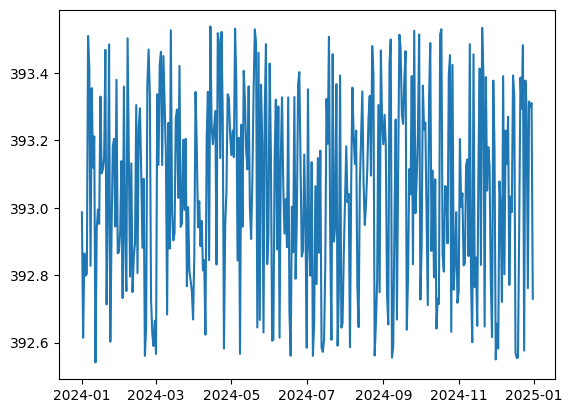

In [188]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)

#Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(datas, atv)
plt.show()


0      1.999852
1      1.999407
2      1.998667
3      1.997630
4      1.996298
         ...   
361    1.998667
362    1.999407
363    1.999852
364    2.000000
365    1.999852
Name: Dia do Ano, Length: 366, dtype: float64


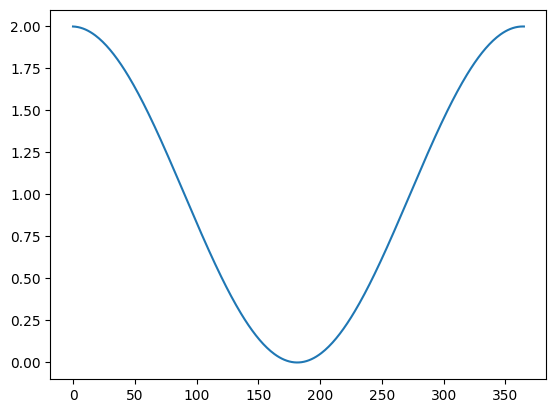

In [189]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365)+1 
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade 
df.to_csv 
print(sazonalidade)


In [190]:
#Variablidade com Monte Carlo
import numpy as np

# Gerando variabilidade usando o método Monte Carlo
df['variabilidade'] = np.random.rand(len(df)) * (atvMax - atvMin) + atvMin

# Definindo a produção diária aplicando variabilidade
df['producao_diaria'] =  df['variabilidade'] + df['sazonalidade'] 

#plt.plot(df['Mes'], df['variabilidade'])

# Salvando o DataFrame em um arquivo CSV dentro da pasta "outputs"
output_folder = 'outputs/'
output_filename = 'dataframe_output.csv'
df.to_csv(output_folder + output_filename, index=False)

print (df)


          Data  Mes  Dia do Ano   atividade  sazonalidade  variabilidade  \
0   2024-01-01    1           1  392.986723      1.999852     393.336426   
1   2024-01-02    1           2  392.614365      1.999407     392.614363   
2   2024-01-03    1           3  392.864470      1.998667     393.101845   
3   2024-01-04    1           4  392.798249      1.997630     392.756681   
4   2024-01-05    1           5  392.804436      1.996298     393.503100   
..         ...  ...         ...         ...           ...            ...   
361 2024-12-27   12         362  392.761634      1.998667     393.203292   
362 2024-12-28   12         363  393.315620      1.999407     393.241252   
363 2024-12-29   12         364  393.298655      1.999852     393.313628   
364 2024-12-30   12         365  393.310377      2.000000     392.640802   
365 2024-12-31   12         366  392.730132      1.999852     393.134846   

     producao_diaria  
0         395.336278  
1         394.613771  
2         395.1005

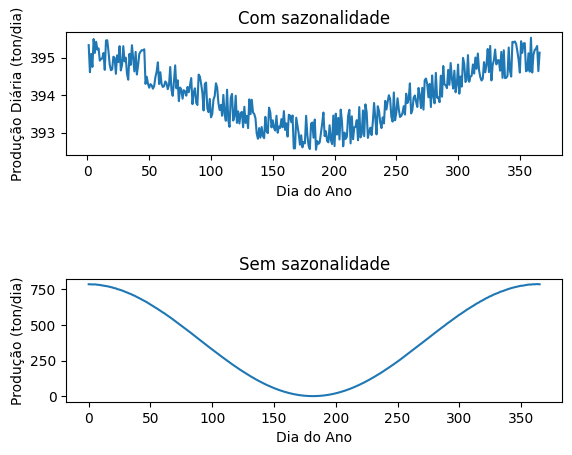

In [191]:
# Vamos usar essa coluna para o eixo x no gráfico
fig, ax = plt.subplots(2)

# Plotagem do segundo gráfico
ax[1].plot(df['atividade']*df['sazonalidade'])
ax[1].set_title('Sem sazonalidade')
ax[1].set_xlabel('Dia do Ano')
ax[1].set_ylabel('Produção (ton/dia)')

# Plotagem do primeiro gráfico
ax[0].plot(df['Dia do Ano'], df['producao_diaria'])
ax[0].set_title('Com sazonalidade')
ax[0].set_xlabel('Dia do Ano')
ax[0].set_ylabel('Produção Diária (ton/dia)')

# Adicionando espaço entre os gráficos
plt.subplots_adjust(hspace=1)

plt.show()


## Qual a variabilidade temporal da taxa de atividade? estime esta taxa e demonstre a componente sazonal (variabilidade entre meses) e aleatória. Faça figuras e discuta. 

Através da análise dos gráficos, pôde-se constatar que a taxa de atividade "Sem Sazonalidade" é consistentemente superior àquela que leva em consideração uma sazonalidade aleatória. Isso ocorre porque os valores da primeira mantêm um comportamento estável ao longo do ano.

# Etapa 04: Estimando emissões

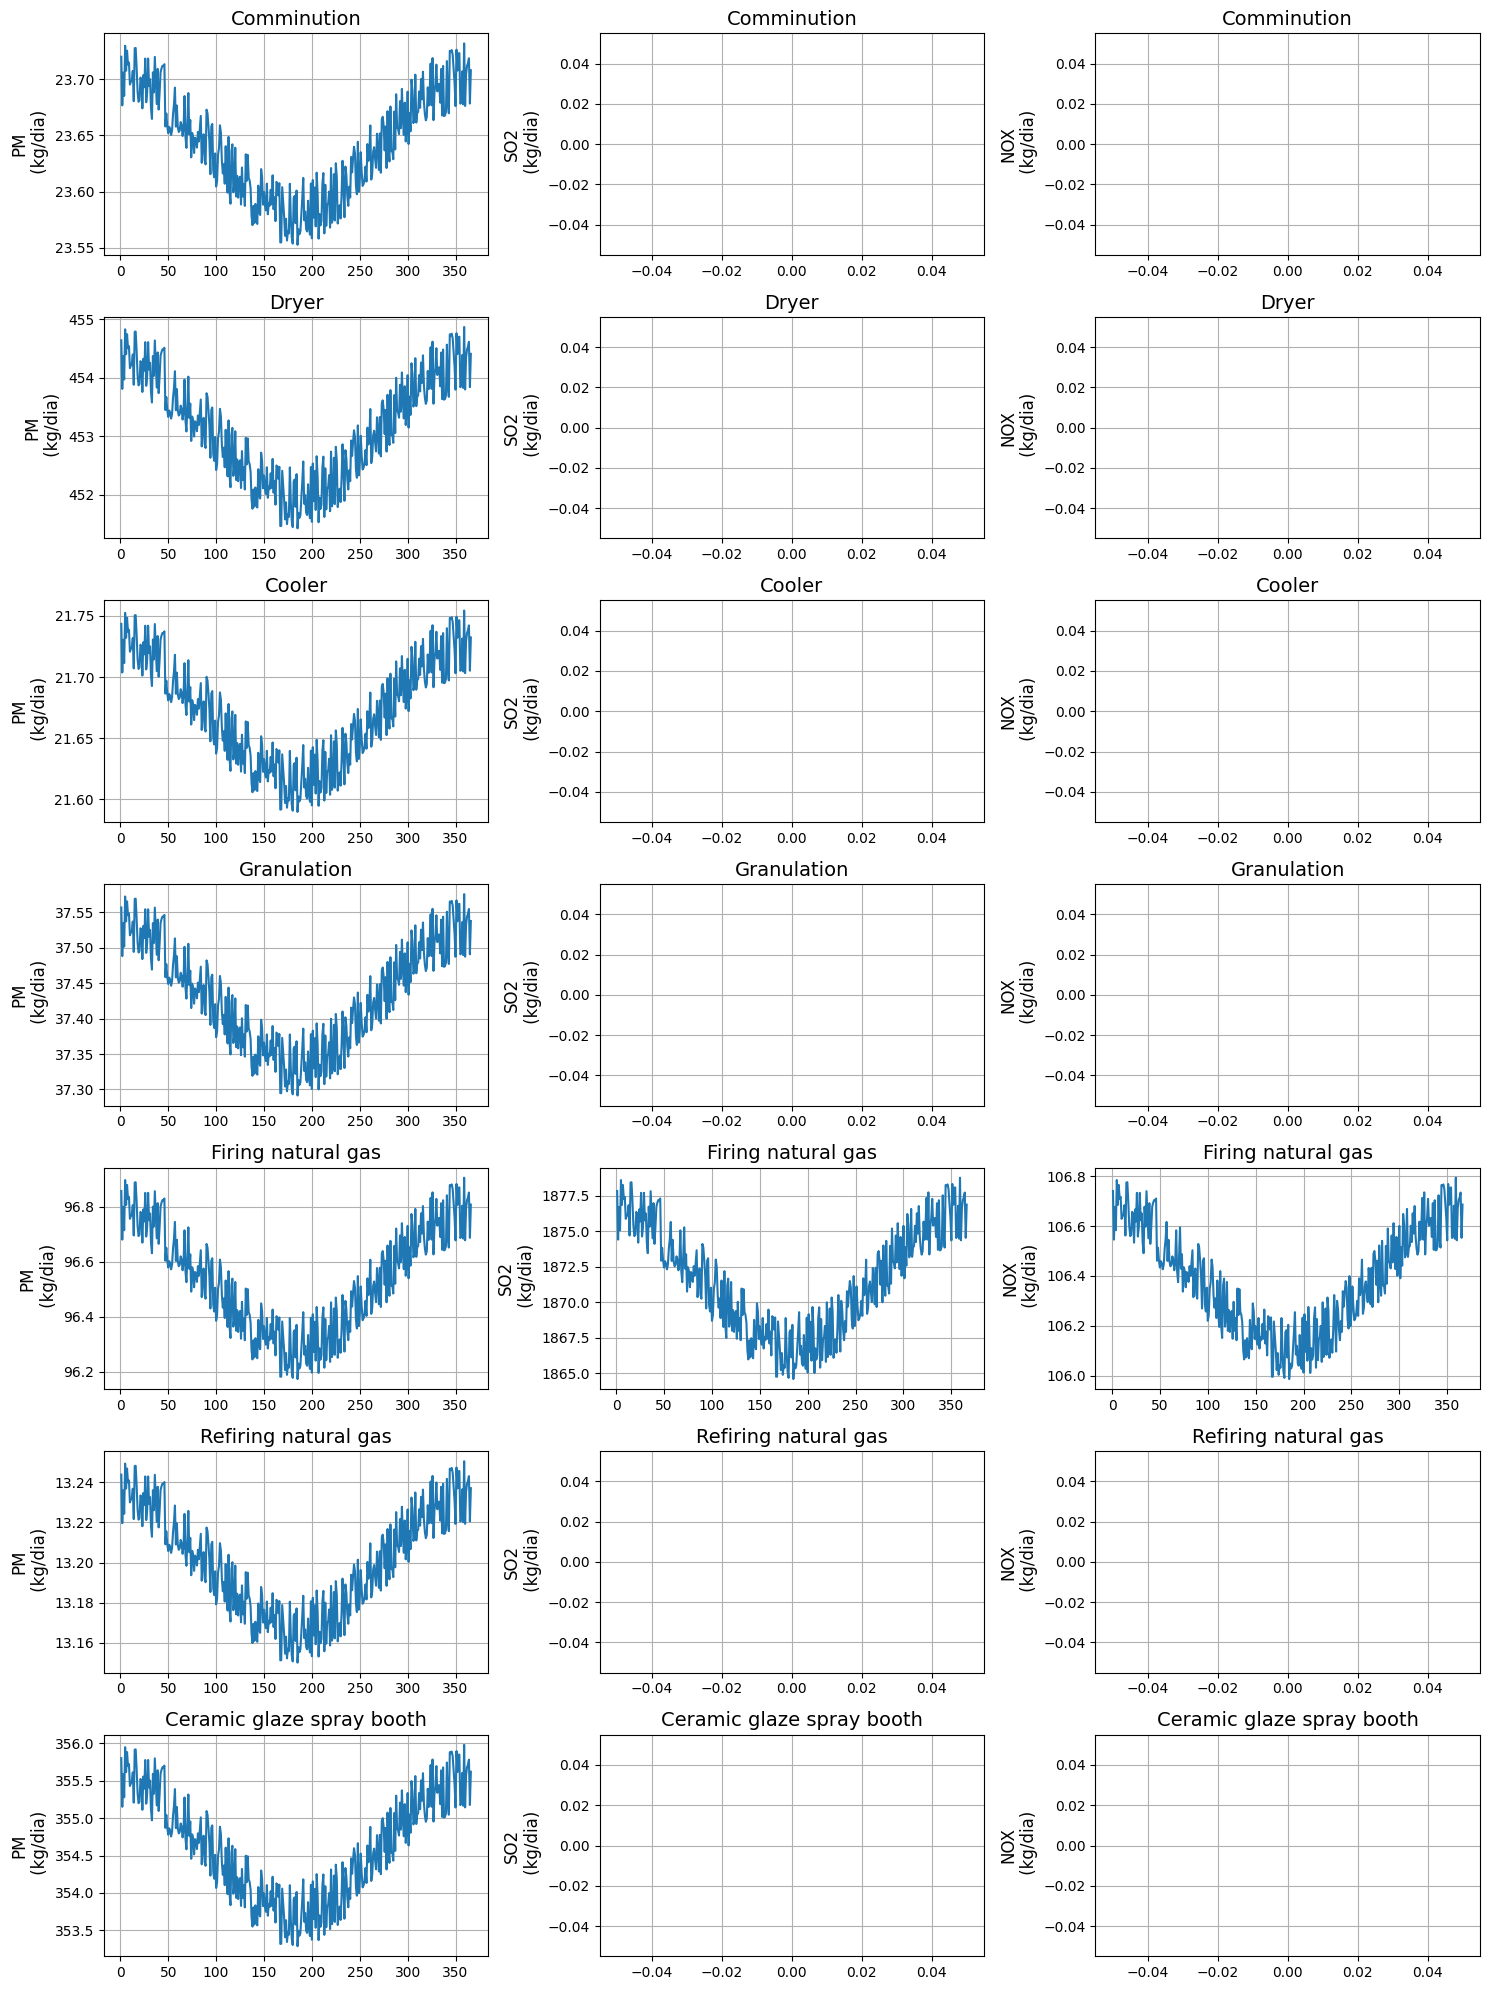

In [192]:
import matplotlib.pyplot as plt

# Definindo os processos e seus respectivos títulos
processos = [
    ('Comminution', 0),
    ('Dryer', 1),
    ('Cooler', 2),
    ('Granulation', 3),
    ('Firing natural gas', 4),
    ('Refiring natural gas', 5),
    ('Ceramic glaze spray booth', 6)
]

# Criando subplots para cada processo
fig, axs = plt.subplots(7, 3, figsize=(15, 20))
for idx, (processo, idx_fe) in enumerate(processos):
    for ii in range(1, 4):
        ax = axs[idx, ii-1]
        ax.plot(df['Dia do Ano'], df['producao_diaria']*fe.iloc[idx_fe, ii])
        ax.set_ylabel(fe.columns[ii]+'\n (kg/dia)', fontsize=12)
        ax.set_title(processo, fontsize=14)  # Adicionando o título do processo em cada gráfico
        ax.grid(True)  # Adicionando linhas de grade
plt.tight_layout()
plt.show()

## Emissões mensais

In [196]:
# Cálcula emissões para cada poluente
labels = ['PM', 'SO2', 'NOX']
for label in labels:
    # Obtém o índice do poluente no dataframe de fatores de emissão
    idx_poluente = fe.columns.get_loc(label)

    # Soma os fatores de emissão de cada processo para o poluente atual
    SomaFE = fe.iloc[:, idx_poluente].sum()

    # Calcula a emissão total do poluente
    emissSoma = round(df['producao_diaria'].sum() * SomaFE, 2)

    # Imprime o resultado
    print(f'A soma das emissões de {label} foi de {emissSoma} kg')


A soma das emissões de PM foi de 366078.78 kg
A soma das emissões de SO2 foi de 685000.67 kg
A soma das emissões de NOX foi de 38936.88 kg


In [194]:
# Calcular a emissão média, mínima e máxima para cada poluente
resultados_emissoes = {}
for poluente in fe.columns[1:]:
    # Criar uma série pandas para armazenar a emissão total para o poluente
    emissao_total = pd.Series(dtype='float64')
    
    # Somar as emissões de todos os processos para o poluente
    for col_name in df_emissoes_totais.columns:
        if poluente in col_name:  # Verificar se o nome do poluente está no nome da coluna
            emissao_total = emissao_total.add(df_emissoes_totais[col_name], fill_value=0)
    
    # Calcular a emissão média, mínima e máxima
    emissao_media = emissao_total.mean()  # Média das emissões totais
    emissao_minima = emissao_total.min()  # Mínima das emissões totais
    emissao_maxima = emissao_total.max()  # Máxima das emissões totais
    
    resultados_emissoes[poluente] = {
        'Emissão Média (g/s)': emissao_media,
        'Emissão Mínima (g/s)': emissao_minima,
        'Emissão Máxima (g/s)': emissao_maxima
    }

# Exibir os resultados para cada poluente
for poluente, resultados in resultados_emissoes.items():
    print(f"Resultados para o poluente '{poluente}':")
    for chave, valor in resultados.items():
        print(f"{chave}: {valor} ")
    print()  # Adiciona uma linha em branco após cada conjunto de resultados

Resultados para o poluente 'PM':
Emissão Média (g/s): 1000.2614325897155 
Emissão Mínima (g/s): 996.5369313544486 
Emissão Máxima (g/s): 1004.0137385385287 

Resultados para o poluente 'SO2':
Emissão Média (g/s): 1871.672958361689 
Emissão Mínima (g/s): 1864.7037320991262 
Emissão Máxima (g/s): 1878.694212352969 

Resultados para o poluente 'NOX':
Emissão Média (g/s): 106.3898313174013 
Emissão Mínima (g/s): 105.99368582458192 
Emissão Máxima (g/s): 106.78893417585299 



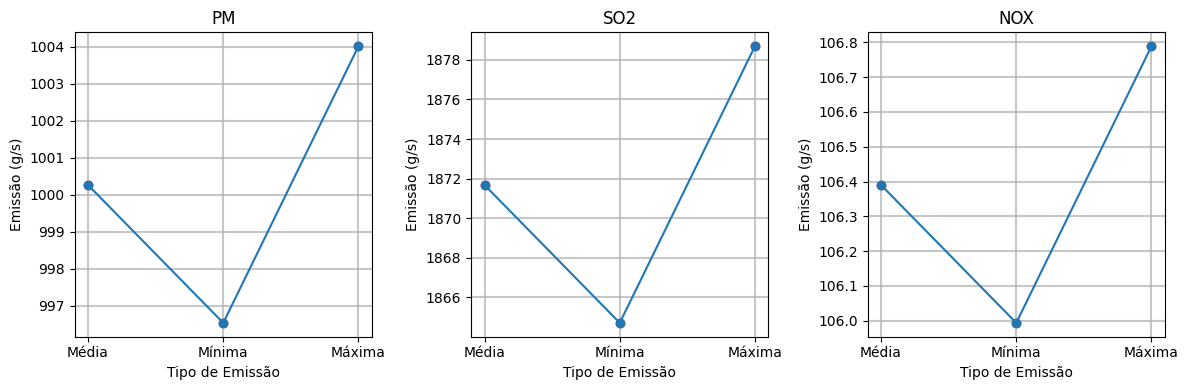

In [195]:
import matplotlib.pyplot as plt

# Extrair os dados para plotagem
poluentes = list(resultados_emissoes.keys())

# Configurar o número de poluentes para plotagem
num_poluentes = len(poluentes)

# Criar subplots em uma linha
fig, axs = plt.subplots(1, num_poluentes, figsize=(12, 4))

# Plotagem de cada poluente individualmente
for i, poluente in enumerate(poluentes):
    emissoes_medias = resultados_emissoes[poluente]['Emissão Média (g/s)']
    emissoes_minimas = resultados_emissoes[poluente]['Emissão Mínima (g/s)']
    emissoes_maximas = resultados_emissoes[poluente]['Emissão Máxima (g/s)']
    
    # Plotagem das linhas para cada poluente
    axs[i].plot([1, 2, 3], [emissoes_medias, emissoes_minimas, emissoes_maximas], marker='o', label='Pontos')
    axs[i].scatter([1, 2, 3], [emissoes_medias, emissoes_minimas, emissoes_maximas], marker='o', color='red')
    axs[i].set_title(f'{poluente}')  # Definindo o título como o nome do poluente
    axs[i].set_xlabel('Tipo de Emissão')
    axs[i].set_ylabel('Emissão (g/s)')
    axs[i].set_xticks([1, 2, 3])
    axs[i].set_xticklabels(['Média', 'Mínima', 'Máxima'])
    axs[i].grid(True, which='both', linestyle='-', linewidth=1.5, alpha=0.7)  # Adicionando linhas de grade horizontais e verticais

# Ajuste de layout
plt.tight_layout()
plt.show()


### Qual a soma das emissões considerando todos os processos? qual a emissão média, mínima e máxima (unidades sempre em gramas por segundo - g/s)

### Referências

- https://mohawkind.com/_pdf/Eliane_2022_ESG_PT.pdf
- https://www.eliane.com/institucional
- https://www.eliane.com/produtos/bianco-plus-na-60x60-sc-8017071 